In [3]:
from data_helpers import load_data, clean_data, export_data
from chart_helpers import (plot_for_region, stats_for_region, 
    plot_growth_factor_for_region, plot_cfr_for_region,
    growth_factor_stats_for_region, cfr_stats_for_region,
    plot_lin_reg_for_cfr_for_region)


In [4]:
# Data for confirmed cases, deaths and recovered instances  
# is separated into three files for this data repo:
DATA_BASE_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_{}_global.csv'

COUNTRY = 'Global'

In [5]:
raw_data = load_data(DATA_BASE_URL)
data = {key: clean_data(df) for key, df in raw_data.items()}

## Corona stats per region

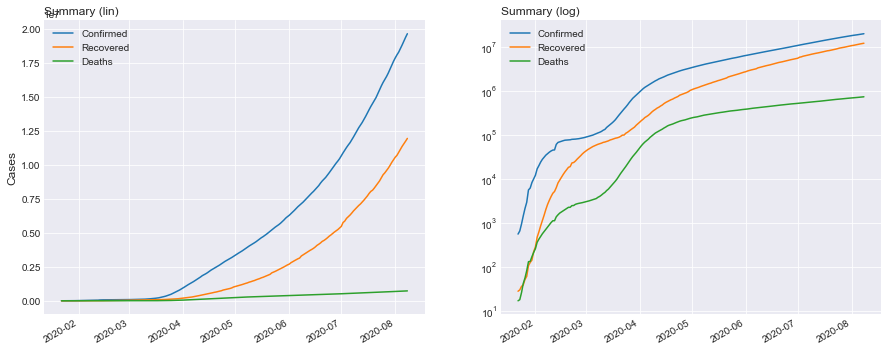

In [6]:
plot_for_region(data, region='Global')

In [5]:
print("SHOW NEW CASES HERE stats_helpers.new_cases_for_region(data, region)")

SHOW NEW CASES HERE stats_helpers.new_cases_for_region(data, region)


In [6]:
stats_for_region(data, 'Global')

,Confirmed,Recovered,Deaths
Global,"19,637,506","11,939,109","726,781"


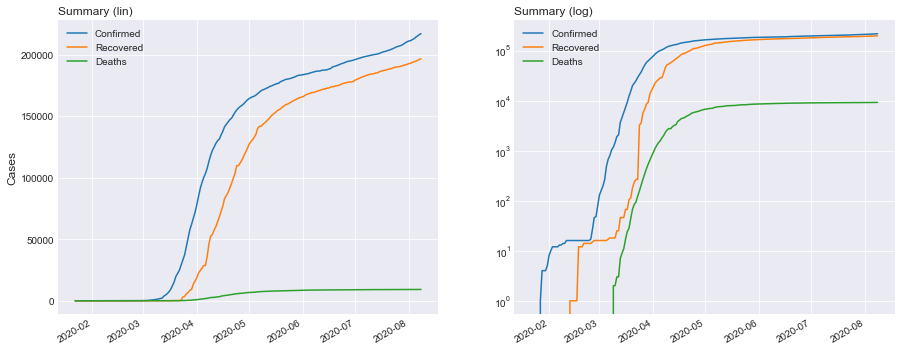

In [7]:
plot_for_region(data, COUNTRY)

In [8]:
stats_for_region(data, COUNTRY)

,Confirmed,Recovered,Deaths
Germany,"216,903","196,550","9,201"


## Growth Factor

How fast is the population of infected growing for a given region?

Growth factor $= \frac {\Delta N_d}{\Delta N_{d-1}}$

New cases of one day divided by the new cases of the previous day.

During exponential growth the factor stays consistently above 1. As you reach the inflection point of a logistic curve (which describes growth in a biological population) the growth factor will become closer to 1 and eventually fall below it. 

[Exponential growth and epidemics (3Blue1Brown on Youtube)](https://www.youtube.com/watch?v=Kas0tIxDvrg)

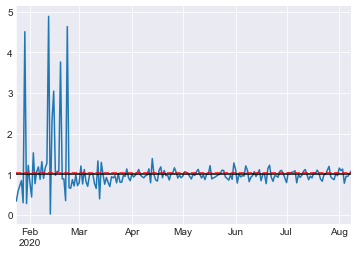

In [7]:
plot_growth_factor_for_region(data, 'Global')

In [8]:
growth_factor_stats_for_region(data, 'Global')

,Current,Mean
Global,1.082541,1.042698


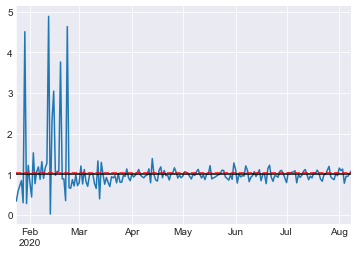

In [9]:
plot_growth_factor_for_region(data, COUNTRY)

In [10]:
growth_factor_stats_for_region(data, COUNTRY)

,Current,Mean
Global,1.082541,1.042698


## Case Fatality Rate

The case fatality rate (CFR) represents the proportion of cases who eventually die from a disease.
Once an epidemic has ended, it is calculated with the formula: 
    
CFR $= \frac {deaths}{cases}$

But while an epidemic is still ongoing, as it is the case with the current novel coronavirus outbreak, this formula is, at the very least, "naïve" and can be "misleading if, at the time of analysis, the outcome is unknown for a non negligible proportion of patients."

In other words, current deaths belong to a total case figure of the past, not to the current case figure in which the outcome (recovery or death) of a proportion (the most recent cases) hasn't yet been determined.

The correct formula, therefore, would appear to be:

CFR $= \frac {deaths_i}{cases_{i-T}}$

[Coronavirus (COVID-19) Mortality Rate](https://www.worldometers.info/coronavirus/coronavirus-death-rate/)

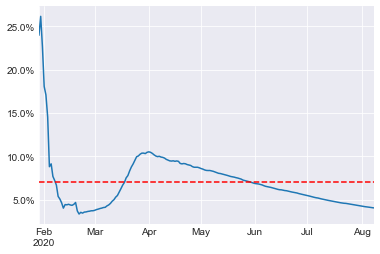

In [11]:
plot_cfr_for_region(data, 'Global', t=7)

In [12]:
cfr_stats_for_region(data, 'Global', t=7)

,Current,Mean
Global,4.07%,7.02%


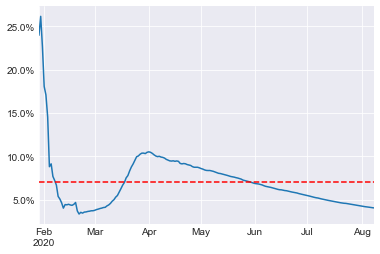

In [13]:
plot_cfr_for_region(data, COUNTRY, t=7)

In [14]:
cfr_stats_for_region(data, COUNTRY, t=7)

,Current,Mean
Global,4.07%,7.02%


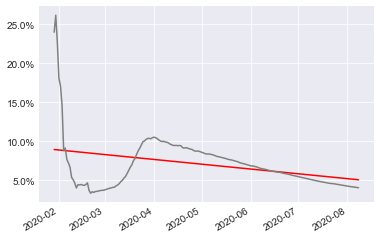

In [15]:
plot_lin_reg_for_cfr_for_region(data, 'Global', t=7)

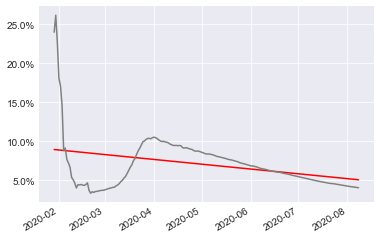

In [16]:
plot_lin_reg_for_cfr_for_region(data, COUNTRY, t=7)

In [17]:
export_data(data)

Exported stats [ 20200809_stats.json ].
Exported growth_factor [ 20200809_growth_factor.json ].
Exported cfr [ 20200809_cfr.json ].
Exported cfr_lin_reg [ 20200809_cfr_lin_reg.json ].
